# KNN on IRIS Dataset 

### ANKIT KHANNA
### ID: 1001553616

#### Importing Libraries

In [409]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#### Importing and Reading IRIS Dataset

In [410]:
col = ['sepal_length','sepal_width','petal_length','petal_width','class']
data = pd.read_csv("iris.data", header = None, names = col)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [411]:
# variable for label encoder for class column
le = preprocessing.LabelEncoder()

# data segregation
x = data.iloc[:,:4]
y = le.fit_transform(list(data["class"]))

# 80/20 random split of dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = np.random)

# 60/20/20 random split of dataset to train, develop and test
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.25, random_state = np.random)

# converting dataframe into numpy arrays for easier iteration
x_train, x_test, y_train, y_test, x_dev, y_dev = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test), np.array(x_dev), np.array(y_dev)

# Length of train, develop, test and total records
print("Train records:", len(x_train),'\n'"Development records:", len(x_dev),'\n' "Test records:", len(x_test),'\n'"Total records:", len(x))

Train records: 90 
Development records: 30 
Test records: 30 
Total records: 150


#### Functions for Distance Measures

In [412]:
def euclidean_distance(row1, row2):
    dist = 0.0
    for i in range(len(row1)-1):
        dist += (row1[i] - row2[i])**2
    return math.sqrt(dist)

In [413]:
def cosine_similarity_func(row1, row2):
    sim = 0.0
    dot = np.dot(row1, row2)
    norm1 = np.linalg.norm(row1)
    norm2 = np.linalg.norm(row2)
    sim = dot / (norm1 * norm2)
    return sim

In [414]:
def normalized_euclidean_distance(row1, row2):
    dist = 0.0
    dist = 0.5*(np.std(row1-row2)**2) / (np.std(row1)**2+np.std(row2)**2)
    return dist

In [415]:
def intersection(lst1, lst2): 
    lst = [value for value in lst1 if value in lst2] 
    return lst 

### KNN ALGORITHM

In [416]:
def KNN_algo(x_test, x_train, k, metric):
    rows = x_test.shape[0]
    cols = x_train.shape[0]

    # initializing arrays
    euc_dist = np.zeros((rows,cols))
    cos_dist = np.zeros((rows,cols))
    norm_dist = np.zeros((rows,cols))


    for row in range(rows):
        for col in range(cols):
            # for euclidean
            euc_dist[row,col] = euclidean_distance(x_test[row], x_train[col])
            # for cosine similarity
            cos_dist[row,col] = cosine_similarity_func(x_test[row], x_train[col])
            # for normalized euclidean distance
            norm_dist[row,col] = normalized_euclidean_distance(x_test[row], x_train[col])

    if metric.lower() == 'euclidean':
        rows = euc_dist.shape[0]
        euc_pred = []
        
        for i in range(rows):
            euc_y_idx = np.argsort(euc_dist[i,:])
            euc_closest = y_train[euc_y_idx[:k]]
            euc_val = Counter(euc_closest).most_common()
            euc_pred.append(euc_val[0][0])
   
        num_correct = np.sum(euc_pred == y_train)
        accuracy = float(num_correct) / y_train.shape[0]
        num_incorr = len(euc_pred) - num_correct
    
    elif metric.lower() == 'cosine':
        rows = cos_dist.shape[0]
        cos_pred = []
        
        for i in range(rows):
            cos_y_idx = np.argsort(cos_dist[i,:])
            cos_closest = y_train[cos_y_idx[:k]]
            cos_val = Counter(cos_closest).most_common()
            cos_pred.append(cos_val[0][0])
            
        num_correct = len(intersection(cos_pred,y_train))
        accuracy = float(num_correct) / y_train.shape[0]
        num_incorr = len(cos_pred) - num_correct
        
    elif metric.lower() == 'normalized euclidean':
        rows = norm_dist.shape[0]
        neuc_pred = []

        for i in range(rows):
            neuc_y_idx = np.argsort(norm_dist[i,:])
            neuc_closest = y_train[neuc_y_idx[:k]]
            neuc_val = Counter(neuc_closest).most_common()
            neuc_pred.append(neuc_val[0][0])   
            
        num_correct = np.sum(neuc_pred == y_train)
        accuracy = float(num_correct)/y_train.shape[0]
        num_incorr = len(neuc_pred)-num_correct
    
    print('ACCURACY:')    
    print('Correctly classified instances:', num_correct)
    print('Incorrectly classified instances:', num_incorr)
    print("Accuracy based on", metric," with", k,"Neighbors:", accuracy*100,'%')
    print('*********************************************************************')
    print('\n')

    return accuracy

### Calculating Accuracy using Development Dataset

In [417]:
euc1 = KNN_algo(x_train,x_train,1,'euclidean')
euc3 = KNN_algo(x_train,x_train,3,'euclidean')
euc5 = KNN_algo(x_train,x_train,5,'euclidean')
euc7 = KNN_algo(x_train,x_train,7,'euclidean')

cos1 = KNN_algo(x_train,x_train,1,'cosine')
cos3 = KNN_algo(x_train,x_train,3,'cosine')
cos5 = KNN_algo(x_train,x_train,5,'cosine')
cos7 = KNN_algo(x_train,x_train,7,'cosine')

ne1 = KNN_algo(x_train,x_train,1,'normalized euclidean')
ne3 = KNN_algo(x_train,x_train,3,'normalized euclidean')
ne5 = KNN_algo(x_train,x_train,5,'normalized euclidean')
ne7 = KNN_algo(x_train,x_train,7,'normalized euclidean')

ACCURACY:
Correctly classified instances: 90
Incorrectly classified instances: 0
Accuracy based on euclidean  with 1 Neighbors: 100.0 %
*********************************************************************


ACCURACY:
Correctly classified instances: 89
Incorrectly classified instances: 1
Accuracy based on euclidean  with 3 Neighbors: 98.88888888888889 %
*********************************************************************


ACCURACY:
Correctly classified instances: 89
Incorrectly classified instances: 1
Accuracy based on euclidean  with 5 Neighbors: 98.88888888888889 %
*********************************************************************


ACCURACY:
Correctly classified instances: 86
Incorrectly classified instances: 4
Accuracy based on euclidean  with 7 Neighbors: 95.55555555555556 %
*********************************************************************


ACCURACY:
Correctly classified instances: 90
Incorrectly classified instances: 0
Accuracy based on cosine  with 1 Neighbors: 100.0 %

### Accuracy barcharts

In [418]:
import matplotlib.pyplot as plt

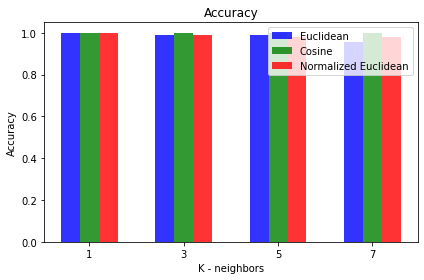

In [419]:
# data to plot
n_groups = 4
euclidean = (euc1, euc3, euc5, euc7)
cosine = (cos1, cos3, cos5, cos7)
normalized_euclidean = (ne1, ne3, ne5, ne7)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, euclidean, bar_width,
alpha=opacity,
color='b',
label='Euclidean')

rects2 = plt.bar(index + bar_width, cosine, bar_width,
alpha=opacity,
color='g',
label='Cosine')

rects3 = plt.bar(index + bar_width + bar_width, normalized_euclidean, bar_width,
alpha=opacity,
color='r',
label='Normalized Euclidean')

plt.xlabel('K - neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(index + bar_width, ('1', '3', '5', '7'))
plt.legend()

plt.tight_layout()
plt.show()

### Final Accuracy using test dataset

In [420]:
def KNN_algo(x_test,x_train,k,metric):
    rows = x_test.shape[0]
    columns = x_train.shape[0]

    euc_dist = np.zeros((rows,columns))
    cos_dist = np.zeros((rows,columns))
    norm_dist = np.zeros((rows,columns))


    for row in range(rows):
        for col in range(columns):
            #for euclidean
            euc_dist[row,col] = euclidean_distance(x_test[row], x_train[col])
            #for cosine similarity
            cos_dist[row,col] = cosine_similarity_func(x_test[row], x_train[col])
            #for normalized euclidean distance
            norm_dist[row,col] = normalized_euclidean_distance(x_test[row], x_train[col])

    if metric.lower() == 'euclidean':
        rows = euc_dist.shape[0]
        euc_pred = []
        
        for i in range(rows):
            euc_y_idx = np.argsort(euc_dist[i,:])
            euc_closest = y_train[euc_y_idx[:k]]
            euc_val = Counter(euc_closest).most_common()
            euc_pred.append(euc_val[0][0])

        num_correct = np.sum(euc_pred == y_test)
        accuracy = float(num_correct) / y_test.shape[0]
        num_incorr = len(euc_pred) - num_correct
    
    elif metric.lower() == 'cosine':
        rows = cos_dist.shape[0]
        cos_pred = []
        
        for i in range(rows):
            cos_y_idx = np.argsort(cos_dist[i,:])
            cos_closest = y_train[cos_y_idx[:k]]
            cos_val = Counter(cos_closest).most_common()
            cos_pred.append(cos_val[0][0])

        num_correct = len(intersection(cos_pred,y_test))
        accuracy = float(num_correct) / y_test.shape[0]
        num_incorr = len(cos_pred) - num_correct
        
    elif metric.lower() == 'normalized euclidean':
        rows = norm_dist.shape[0]
        neuc_pred = []

        for i in range(rows):
            neuc_y_idx = np.argsort(norm_dist[i,:])
            neuc_closest = y_train[neuc_y_idx[:k]]
            neuc_val = Counter(neuc_closest).most_common()
            neuc_pred.append(neuc_val[0][0])   
            
        num_correct = np.sum(neuc_pred == y_test)
        accuracy = float(num_correct) / y_test.shape[0]
        num_incorr = len(neuc_pred) - num_correct
    
    print('ACCURACY:')    
    print('Correctly classified instances:', num_correct)
    print('Incorrectly classified instances:', num_incorr)
    print("Accuracy based on", metric," with", k,"Neighbors:", accuracy*100,'%')
    print('*********************************************************************')
    print('\n')

In [424]:
# Using k=7 as best hyperparameter value
KNN_algo(x_test,x_train,7,'normalized euclidean')

ACCURACY:
Correctly classified instances: 28
Incorrectly classified instances: 2
Accuracy based on normalized euclidean  with 7 Neighbors: 93.33333333333333 %
*********************************************************************


